# 🧠 StructDiff: t-SNE Visualization of ESM2 Embeddings
This notebook loads `esm2_embeddings.npy`, applies t-SNE to reduce dimensionality, and plots the embeddings colored by protein class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
# Load embeddings and labels
embeddings = np.load('../embeddings/esm2_embeddings.npy')
df = pd.read_csv('../data/curated_sequences.csv', encoding='ISO-8859-1')
labels = df['class'].values

In [3]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

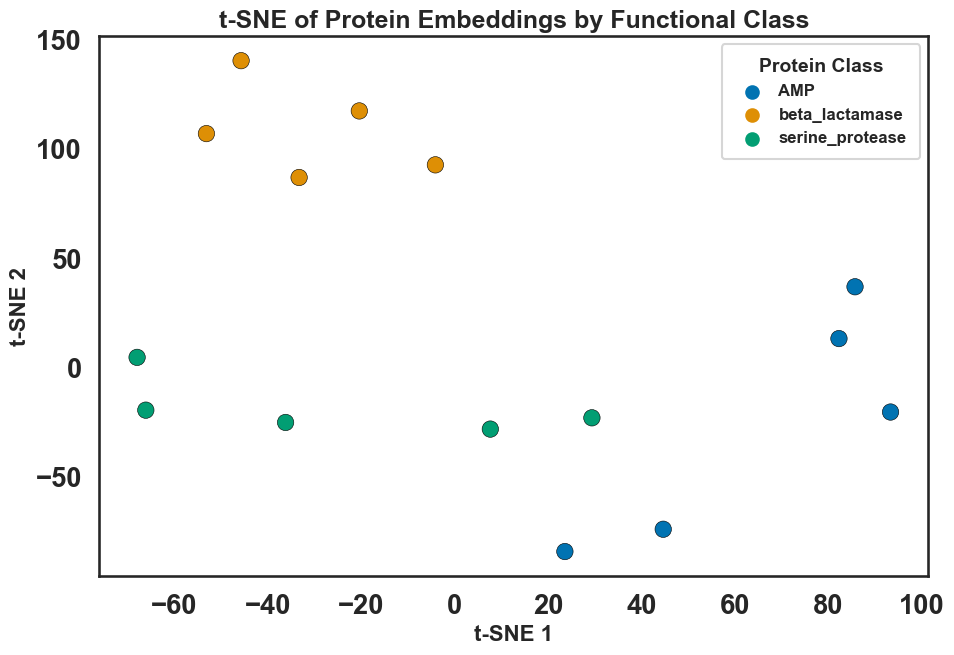

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Arial and bold everywhere
plt.rcParams.update({
    "font.family": "Arial",
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "axes.labelsize": 16,
    "legend.fontsize": 13,
    "legend.title_fontsize": 14
})

# Turn off grid completely
sns.set_style("white")  # disables grid
sns.set_context("talk", font_scale=1.2)

# Create plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    hue=labels,
    palette="colorblind",
    s=140,
    edgecolor="black",
    linewidth=0.4,
    alpha=1,
)

# Improve labels and title
plt.xlabel("t-SNE 1", fontsize=16, fontweight='bold')
plt.ylabel("t-SNE 2", fontsize=16, fontweight='bold')
plt.title("t-SNE of Protein Embeddings by Functional Class", fontsize=18, fontweight='bold')

# Customize legend
legend = plt.legend(
    title="Protein Class",
    title_fontsize=14,
    fontsize=13,
    loc="best",
    frameon=True
)
plt.setp(legend.get_texts(), fontweight='bold', family='Arial')
plt.setp(legend.get_title(), fontweight='bold', family='Arial')

# Clean layout and save
plt.tight_layout()
plt.savefig("../figures/fig2a_tsne.png", dpi=300, bbox_inches='tight')
plt.savefig("../figures/fig2a_tsne.svg", bbox_inches='tight')

plt.legend(
    title="Protein Class",
    title_fontsize=14,
    fontsize=12,
    loc="upper right",
    frameon=True,
    borderpad=0.8,
    labelspacing=0.5,
    handletextpad=0.6
)


plt.show()


In [4]:
!pip install nglview ipywidgets pandas
!jupyter-nbextension enable nglview --py --sys-prefix


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: jupyter-nbextension


In [5]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
Building jupyterlab assets (production, minimized)


In [6]:
import os
import pandas as pd
import nglview as nv
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# === Paths ===
results_dir = "/Users/melaku/Documents/Projects/StructDiff/data"
figures_dir = "/Users/melaku/Documents/Projects/StructDiff/figures"
os.makedirs(figures_dir, exist_ok=True)

# === Collect structure info ===
structure_data = []
for folder in sorted(os.listdir(results_dir)):
    if not folder.startswith("result-StructDiff_"):
        continue

    folder_path = os.path.join(results_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    metrics_path = os.path.join(folder_path, "metrics.csv")
    pdb_path = next((os.path.join(folder_path, f) for f in os.listdir(folder_path)
                     if f.endswith(".pdb") and "rank_001" in f), None)

    if os.path.exists(metrics_path) and pdb_path:
        df = pd.read_csv(metrics_path)
        col_name = next((c for c in df.columns if "plddt" in c.lower() and "avg" in c.lower()), None)
        if not col_name:
            print(f"⚠️ No avg pLDDT found in: {metrics_path}")
            continue
        avg_plddt = df[col_name].iloc[0]
        structure_data.append({
            "id": folder,
            "pdb": pdb_path,
            "avg_plddt": avg_plddt
        })

# === Show + Save summary ===
df_summary = pd.DataFrame(structure_data)
display(HTML("<h2>📊 Predicted Structure pLDDT Summary</h2>"))
display(df_summary[["id", "avg_plddt"]])
df_summary.to_csv(os.path.join(results_dir, "plddt_summary.csv"), index=False)

# === Visualize in 2-column layout ===
n_cols = 2
rows = []

for i in range(0, len(structure_data), n_cols):
    row_widgets = []
    for item in structure_data[i:i+n_cols]:
        view = nv.NGLWidget()
        view.add_component(item["pdb"])
        view.clear_representations()
        view.add_cartoon(color_scheme="bfactor")
        view._remote_call("setSize", target="Widget", args=["500px", "400px"])

        label = widgets.HTML(f"<b>{item['id']}</b><br>Avg pLDDT: {item['avg_plddt']:.2f}")
        box = widgets.VBox([label, view])
        row_widgets.append(box)
    rows.append(widgets.HBox(row_widgets, layout=widgets.Layout(justify_content='center')))

# === Display full layout with manual scrolling
display(HTML("<h2>🔬 Predicted Protein Structures (Colored by pLDDT)</h2>"))
display(widgets.VBox(rows))


,id,avg_plddt
0,result-StructDiff_1-alphafold-example-p8qul,29.65
1,result-StructDiff_2-alphafold-example-p8qul,30.03
2,result-StructDiff_3-alphafold-example-p8qul,45.26
3,result-StructDiff_4-alphafold-example-p8qul,43.54
4,result-StructDiff_5-alphafold-example-p8qul,67.79
